# Probability II

We have determined whether a coin is fair or not. Now let's take more real example.

## The Case
Let's assume you are a data analyst/ scientist on one of travel ecommerce. You have a task to increase engagement for users to use our platform. To simplify our problem let's also assume that we only have two pages: 

### Home Page
![HOme](img/002-01.png)

### Search Result page
![srp](img/002-02.png)

**First thing first** as a quantitative analyst, you should ask to yourselves and to your business people:

> What does it means by users engagement to our platform?

One possible answer is **Tendency of users to use our platform functions**. How to measure such tendency then? getting back to the home page, we have search function. 

then we know that one of the possible answer is to measure usage in that button to move into search result page. Ofcourse, to quantify these measurements, we need some standard metrics.

## Online Metric: Click Through Probability (CTP) and Click Through Rate (CTR)

Here we have define two "often used" metrics to measure the page/function effectiveness. Their definitions are:

$$
CTR = \frac{number \space of \space click \space in \space funnel \space 2}{number \space of \space click \space in \space funnel\space  1}
$$

$$
CTP = \frac{number \space of \space unique \space users \space in \space funnel \space 2}{number \space of \space unique \space users\space  in \space funnel\space  1}
$$


for this case, 

$$
CTR_{home\_page-search\_result\_page} = \frac{number \space of \space click \space in \space search\_result\_page}{number \space of \space click \space in \space home\_page}
$$

$$
CTP_{home\_page-search\_result\_page} = \frac{number \space of \space unique \space users \space in \space search\_result\_page}{number \space of \space unique \space users \space  in \space home\_page}
$$



In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as st
from func import *

On 1 day there are 100 users visiting home page

In [3]:
np.random.seed(310)
users_activities_in_home_page = np.random.choice(100, 1000)
users_activities_in_srp = np.random.choice(100, 200)

In [4]:
def ctp(funnel_1_log, funnel_2_log):
    """
    calculate the Click Through Probability between funnel 1 and funnel 2.
    CTP should be 0 <= CTP <= 1
    Args: 
    ----
    funnel_1_log: list of int (user id)
    funnel_2_log: list of int (user id)
    
    Output:
    ----
    ctp: float
    """
    unique_funnel_1_users = np.unique(funnel_1_log)
    unique_funnel_2_users = np.unique(funnel_2_log)
    
    user_intersection = set(unique_funnel_1_users).intersection(
        set(unique_funnel_2_users)
    )
        
    
    return len(user_intersection) / float(unique_funnel_1_users.shape[0])

def ctr(funnel_1_log, funnel_2_log):
    """
    calculate the Click Through Rate between funnel 1 and funnel 2. 
    CTR may be more than 1, the only constraint that it has is
    CTR >= 0
    Args: 
    ----
    funnel_1_log: list of int (user id)
    funnel_2_log: list of int (user id)
    
    Output:
    ----
    ctr: float
    """    
    return funnel_2_log.shape[0] / funnel_1_log.shape[0]

In [5]:
ctp_current = ctp(users_activities_in_home_page, users_activities_in_srp)
ctr_current = ctr(users_activities_in_home_page, users_activities_in_srp)
# test if your functions has been correctly implemented
assert np.isclose(ctp_current, 0.92)
assert np.isclose(ctr_current, 0.2)

We are only interested in CTP right now. So now the question is given this number what is our probability to get this number? assuming that our users will uniformly come to home page 1000 / day, 200 of them will continue to SRP, while our users is stagnant in 100 (no new users in this questions).

In [6]:
def simulate_ctp(n_activities_home_page, n_activities_search_page, n_users=100, n_simulations=500):
    ctps = []
    for s in range(n_simulations):
        users_activities_in_home_page = np.random.choice(n_users, n_activities_home_page)
        users_activities_in_srp = np.random.choice(n_users, n_activities_search_page)
        
        ctps.append(ctp(users_activities_in_home_page, users_activities_in_srp))
    return np.array(ctps)

In [7]:
# DO NOT CHANGE THIS
ctps = simulate_ctp(1000, 200)

assert len(ctps) == 500

In [8]:
mean_ctp = np.mean(ctps)
std_ctp = np.std(ctps)
lower_1_sigma_ctp, upper_1_sigma_ctp = mean_ctp - std_ctp, mean_ctp + std_ctp

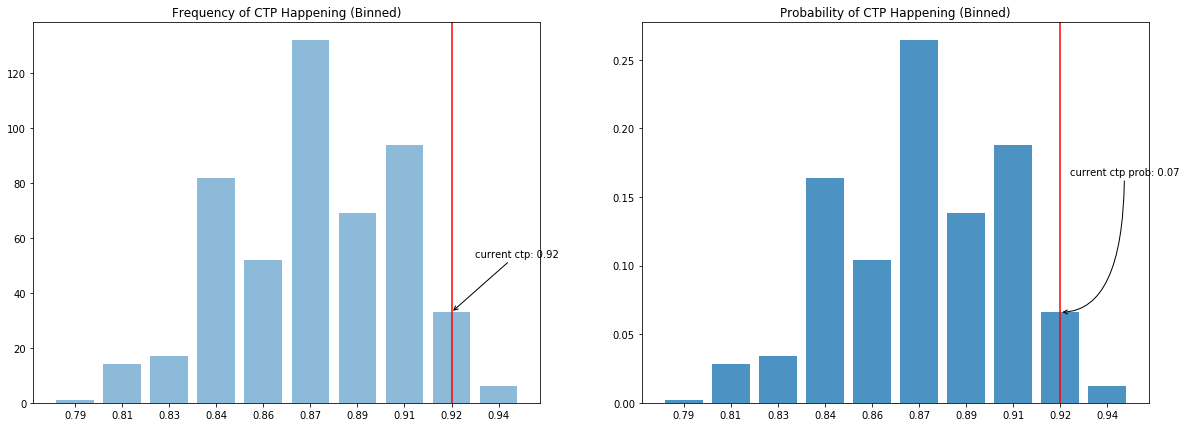

In [9]:
bins = np.linspace(0.7, 1, 20)
ctp_bins = np.digitize(ctps, bins)
ctp_bin_indexes, ctp_bin_counts = np.unique(ctp_bins, return_counts=True)

ctp_current_bin = np.digitize(ctp_current, bins)


draw_ctp_happening_binned(
    ctp_current, 
    bins, 
    ctp_bin_indexes, 
    ctp_bin_counts, 
    ctp_current_bin
)

More simulations!

In [32]:
draw_interactive_bar_plot_for_simulations(
    make_df_for_simulations(simulate_ctp)
)

In [33]:
draw_interactive_prob_bar_plot_for_simulations(
    make_df_for_simulations(simulate_ctp)
)

## Probability Density Function

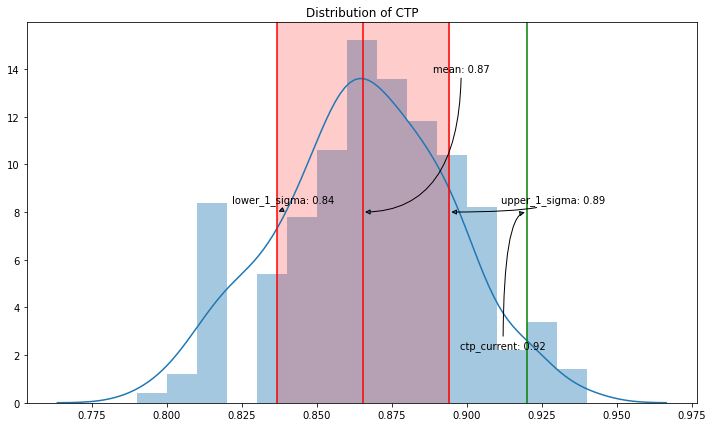

In [192]:
f, ax = plt.subplots(figsize=(12, 7))


sns.distplot(ctps, ax=ax)
plt.axvline(mean_ctp, color='red')
plt.axvline(lower_1_sigma_ctp, color='red')
plt.axvline(upper_1_sigma_ctp, color='red')
plt.axvspan(lower_1_sigma_ctp, upper_1_sigma_ctp, color='red', alpha=0.2)
plt.axvline(ctp_current, color='green')
values = dict(
    mean=mean_ctp,
    lower_1_sigma=lower_1_sigma_ctp,
    upper_1_sigma=upper_1_sigma_ctp,
    ctp_current=ctp_current
)
for k, val in values.items():
    
    x_text, y_text = val + np.random.uniform(-std_ctp, std_ctp), st.norm.pdf(val, loc=mean_ctp, scale=std_ctp)
    plt.annotate(
        '{}: {:.2f}'.format(k, val),
        (val,8),
        xytext=(x_text, y_text),
        arrowprops=dict(
            arrowstyle='-|>',
            connectionstyle='angle3'
        )
    )

plt.title('Distribution of CTP')
plt.show()

In [189]:
def gaussian_dist_pdf(x, mean, std):
    var = std ** 2
    return np.power(np.e, -1 * (x - mean) ** 2 / (2 * var) ) / np.sqrt(2 * np.pi * var) 

gaussian_dist_pdf(0.85, mean_ctp, std_ctp)

12.013012099069801

# References

[1] [Click Through Probability](https://www.youtube.com/watch?v=LFLSApHc-jM)

[2] [Click Through Rate](https://en.wikipedia.org/wiki/Click-through_rate)